### Aplicação: Taxa Interna de Retorno de um investimento e o Método de Newton

Um empreendedor vai fazer um investimento que consiste em investir 100 milhões agora e obter 40 milhões nos 4 anos seguintes. Ele vai financiar esse investimento junto a um banco, que vai lhe cobrar uma taxa de juros. Qual é a maior taxa de juros que o empreendedor está disposto a pagar para, ainda assim, ter lucro com esse investimento?

Quando você estudar Matemática Financeira, você vai aprender que a resposta para essa pergunta é a raiz desta função:

$$
f(x) = -100 + \frac{40}{1+x} + \frac{40}{(1+x)^2} + \frac{40}{(1+x)^3} + \frac{40}{(1+x)^4}
$$

Como podemos encontrar a raiz dessa função?

Vocë vai aprender em Cálculo que a resposta se chama **Método de Newton**. A lógica é simples:

![metodo-newton](http://www.cs.utsa.edu/~wagner/CS3343/newton/newton.gif)

1. Chuta um valor qualquer para $x$.
2. Descubra a reta tangente à função naquele ponto e encontre a raiz dessa reta. Essa raiz é uma aproximação para a raiz da função e será o seu novo "chute".
3. Fique repetindo o passo 2 até que o valor que você está calculando mude muito pouquinho. Esse valor será, aproximadamente, o valor da raiz que você está buscando.

Você vai aprender em Cálculo que a raiz da reta tangente a uma função $f(x)$ em um ponto $x_0$ é

$$
x_1 = x_0 - \frac{f(x)}{f'(x)}
$$

onde 

$$
f'(x) = \frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

é chamada **derivada de f(x) no ponto x**.

Calma. Você vai entender isso melhor quando estudar Cálculo.  
O objetivo aqui é mostrar como é fácil programar isso em Python.   

Vamos começar programando uma função que dá a derivada de uma outra função. Como a derivada implica um $dx$ pequenininho, vamos tomar um $dx$ de 0.0001.

In [8]:
def derivada(f, x, dx = 0.0001):
    dy = f(x + dx) - f(x)
    return(dy/dx)

Agora, vamos criar uma função que, dada uma função $f(x)$ e um ponto $x$, calcula a raiz da reta tangente à função nesse ponto. Essa função meramente aplica a fórmula

$$
x_1 = x_0 - \frac{f(x)}{f'(x)}
$$


In [9]:
def raiz_reta_tangente(f, x):
    return(x - f(x)/derivada(f, x))

O método de Newton consiste em aplicar a função acima várias vezes, enquanto o valor de $x_1$ e $x_0$ não mudarem mais. Podemos fazer isso usando o tema da aula de hoje: um _while loop_.

In [10]:
def raiz(f, x0, tol = 0.0001):
    
    x1 = raiz_reta_tangente(f, x0)
    
    while abs(x1 - x0) > tol:
        x0 = x1
        x1 = raiz_reta_tangente(f, x0)
    
    return(x1)

Vamos testar se nossa função funciona na função $f(x) = x^2 - 25$. Sabemos que a raiz é 5. Logo, se nossas funções estiverem funcionando, o resultado deverá ser 5.

Primeiro, montamos a função $f(x) = x^2 - 25$

In [11]:
def f(x):
    return(x**2 - 25)

Agora, verificamos que nossa função funciona. Precisamos de um chute inicial. Vou colocar o dia do meu aniversário: 1301, um número bem, bem longe da raiz correta.

In [12]:
raiz(f, 1301)

5.000000000015194

Na mosca!!!! Vamos agora voltar ao problema do empreendedor. Qual é a maior taxa de juros que ele estaria disposo a pagar ao banco para, ainda assim, ter lucro no seu investimento?

In [13]:
def f(x):
    return(-100 + 40/(1+x) + 40/(1+x)**2 + 40/(1+x)**3 + 40/(1+x)**4)

In [14]:
raiz(f, 0)

0.21862269876723997

Temos a resposta: 21.86% é o maior valor que um empreendedor estaria disposto a pagar para financiar esse empreendimento. Esse valor se chama **Taxa Interna de Retorno** do empreendimento, e é um dos valores mais importantes para avaliar se um investimento vale a pena.

Para verificar que 21.86% realmente é a raiz da função do enunciado, vamos marcar esse ponto no gráfico dessa função:

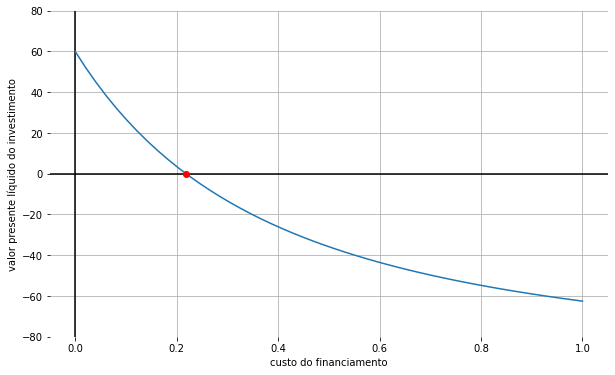

In [15]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,1)
y = f(x)
plt.figure(figsize=(10,6))
plt.box(False)
plt.axhline(y=0, c = 'black')
plt.axvline(x=0, c = 'black')
plt.plot(x,y)
plt.plot(raiz(f,0), 0, 'ro') #Raiz calculada
plt.grid('on')
plt.ylim(-80,80)
plt.xlabel('custo do financiamento')
plt.ylabel('valor presente líquido do investimento')
plt.show()